## Первый проект по статистике

#### Описание данных  

Имеются следующие поля:  

Rank – место по объему продаж  
Name – название игры  
Platform – платформа, на которой выпущена игра  
Year – год релиза  
Genre – жанр  
Publisher – издатель  
NA_Sales – продажи в Северной Америке, в млн.  
EU_Sales – продажи в Европе, в млн.  
JP_Sales – продажи в Японии, в млн.  
Other_Sales – продажи в остальном мире, в млн.  
Global_Sales – продажи по всему миру, в млн.  

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mode

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [4]:
df = pd.read_csv('D:\Carpov_Courses\projects\statistics\stat_1\games.csv')

In [12]:
cols = df.columns
cols

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
col = cols[0]
nulls = df[col].isnull().sum()
for i in cols[1:]:
    
    if df[i].isnull().sum() > nulls:
        nulls = df[i].isnull().sum()
        col = i

print(col, df[col].isnull().sum())

Year 271


In [17]:
df = df.dropna()

In [35]:
df.shape

(16291, 11)

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [36]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [38]:
mode(df.Year)

2009.0

In [49]:
df.query('Year>2007').shape[0]/df.shape[0]*100#доля игр после 2007

49.063900313056294

In [53]:
gc = df.groupby('Year', as_index=False) \
        .agg({'Rank':'count'}) \
        .rename(columns={'Rank':'Game_Count'})
gc.head()

,Year,Game_Count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


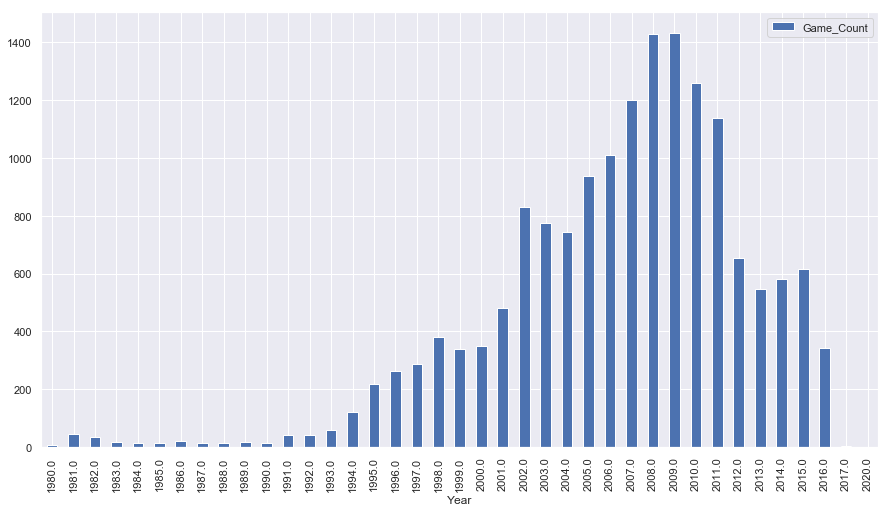

In [59]:
sns.set(rc = {'figure.figsize':(15,8)})
_ = gc.plot.bar(x='Year',y='Game_Count')

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания через запятую с пробелом.

In [101]:
df.Platform.value_counts(normalize=True).reset_index().query('Platform >= 0.07')['index'].values

array(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype=object)

In [109]:
#аналогичное решение
gc = df.groupby('Platform', as_index=False) \
        .agg({'Rank':'count'}) \
        .rename(columns={'Rank':'Game_Count'})
gc['freq'] = (gc['Game_Count']/gc['Game_Count'].sum())*100
#gc.sort_values(by=['freq'], axis=0, ascending=False)
gc.query('freq >= 7').sort_values(by=['freq'], axis=0, ascending=False).Platform.values

array(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype=object)

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [110]:
mode(df.Publisher)

'Electronic Arts'

In [112]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
FuRyu Corporation                  1
Interplay Productions              1
Inti Creates                       1
Playmore                           1
Image Epoch                        1
Name: Publisher, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [118]:
nint = df.query('Publisher == "Nintendo"')
nint.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [119]:
nint.NA_Sales.describe()

count    696.000000
mean       1.172055
std        2.989913
min        0.000000
25%        0.010000
50%        0.375000
75%        0.972500
max       41.490000
Name: NA_Sales, dtype: float64

In [120]:
nint.EU_Sales.describe()

count    696.000000
mean       0.601006
std        1.743953
min        0.000000
25%        0.007500
50%        0.120000
75%        0.482500
max       29.020000
Name: EU_Sales, dtype: float64

In [121]:
nint.JP_Sales.describe()

count    696.000000
mean       0.653721
std        1.063110
min        0.000000
25%        0.090000
50%        0.280000
75%        0.740000
max       10.220000
Name: JP_Sales, dtype: float64

In [122]:
nint.Other_Sales.describe()

count    696.000000
mean       0.136767
std        0.464170
min        0.000000
25%        0.000000
50%        0.030000
75%        0.090000
max        8.460000
Name: Other_Sales, dtype: float64

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:  

- по оси x будет расположен жанр игры (Genre)  
- по оси у – объем продаж в Японии (JP_sales)  

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?  
  
Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

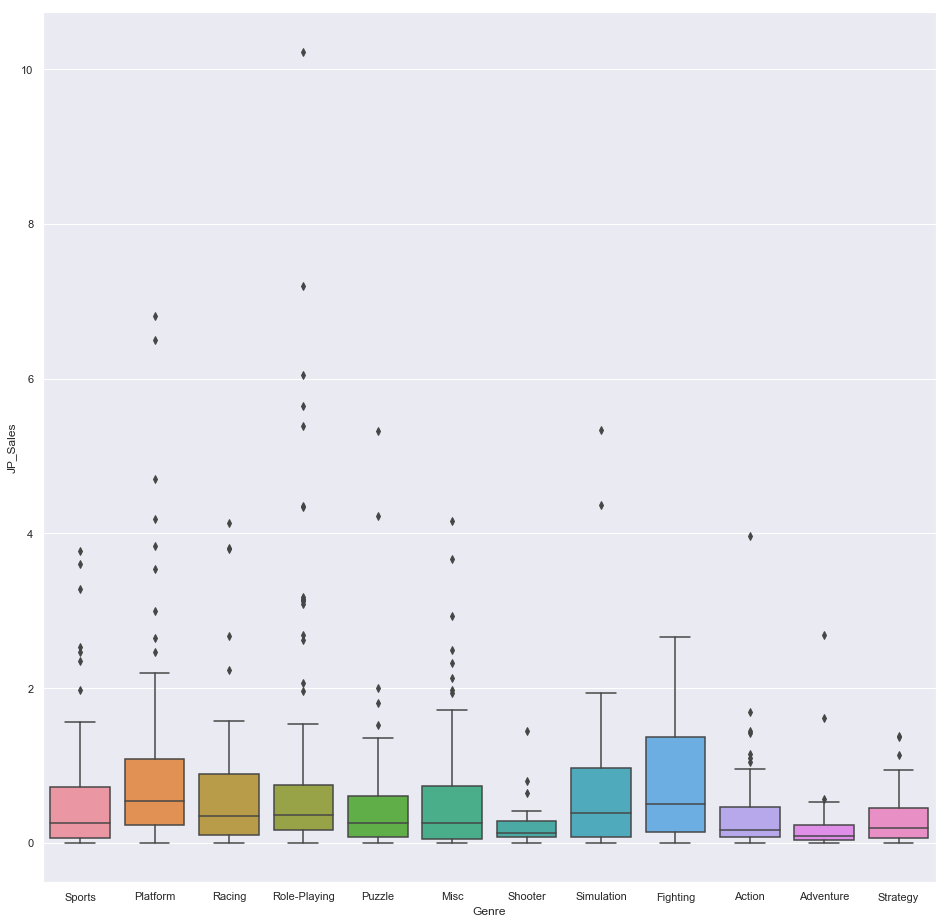

In [126]:
plt.figure(figsize=(16,16))
_ = sns.boxplot(x=nint['Genre'], y=nint['JP_Sales'])

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени продажи игр жанра Sports резко увеличились? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [142]:
nint_genres = nint.query('Genre == ["Fighting", "Simulation", "Platform", "Racing", "Sports"]')
nint_genres.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [145]:
nint_genres = nint_genres.groupby(['Year','Genre'], as_index=False).agg({'Global_Sales':'sum'})
nint_genres.head()

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17


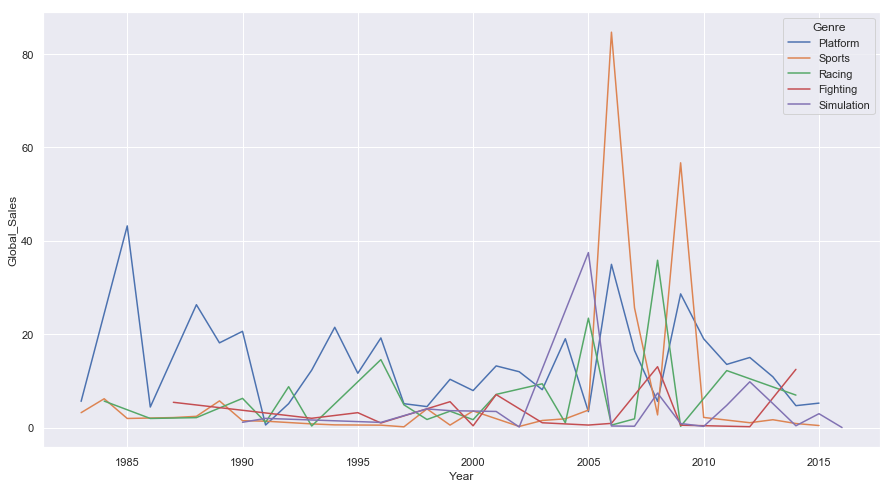

In [149]:
_ = sns.lineplot(x = nint_genres['Year'], y = nint_genres['Global_Sales'], hue = nint_genres['Genre'])